In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df =  pd.read_csv("/kaggle/input/house-price/house_prices.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [5]:

df.describe()
df.isnull().sum()


Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [6]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df.columns

Index(['Index', 'Title', 'Description', 'Amount(in rupees)',
       'Price (in rupees)', 'location', 'Carpet Area', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Super Area',
       'Dimensions', 'Plot Area'],
      dtype='object')

In [8]:
df.isnull().sum().sort_values(ascending=False)
df.dropna(thresh=0.5*len(df), axis=1)



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,1,2,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,NaN,Freehold
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,2,NaN,Freehold
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,1,1,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",2,NaN,Co-operative Society
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,3,3,Freehold
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",3,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",3,2,Freehold
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,Semi-Furnished,NaN,Main Road,2,NaN,NaN


In [9]:
df.drop(['Dimensions', 'Plot Area','Description','Amount(in rupees)'], axis=1, inplace=True)

In [10]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
df.replace([np.inf, -np.inf], np.nan)
df.dropna(subset=['Price (in rupees)'])



,Index,Title,Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,East,Main Road,Srushti Siddhi Mangal Murti Complex,1,2,1 Covered,Freehold,1100 sqft
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,2,1 Open,Freehold,1100 sqft
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,2,1 Covered,Freehold,1100 sqft
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,6034.0,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,East,Main Road,Hamdam Apartment,1,1,1 Covered,Freehold,1100 sqft
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,2,1 Covered,Co-operative Society,1100 sqft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,3225.0,zirakpur,1000 sqft,Ready to Move,2 out of 4,New Property,Semi-Furnished,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,3274.0,zirakpur,1000 sqft,Ready to Move,4 out of 6,Resale,Unfurnished,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,2,1 Covered,Freehold,1680 sqft
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,Furnished,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,1100 sqft
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,4231.0,zirakpur,1000 sqft,Ready to Move,2 out of 2,Resale,Semi-Furnished,East,Main Road,Friends Enclave,2,2,1 Covered,Freehold,709 sqft


In [12]:
# Check which columns have missing values
df.isnull().sum()


Index                0
Title                0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64

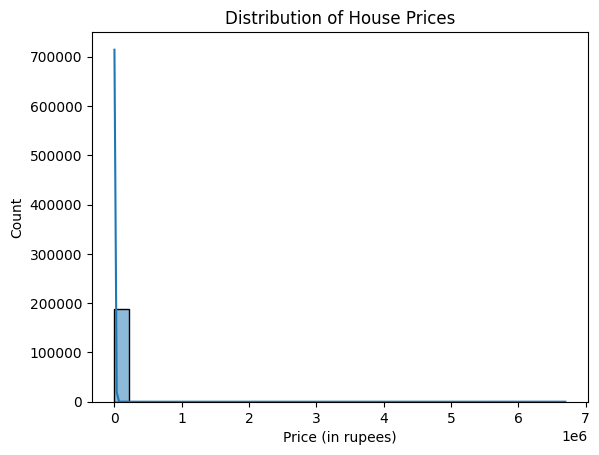

In [13]:
sns.histplot(df['Price (in rupees)'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.show()


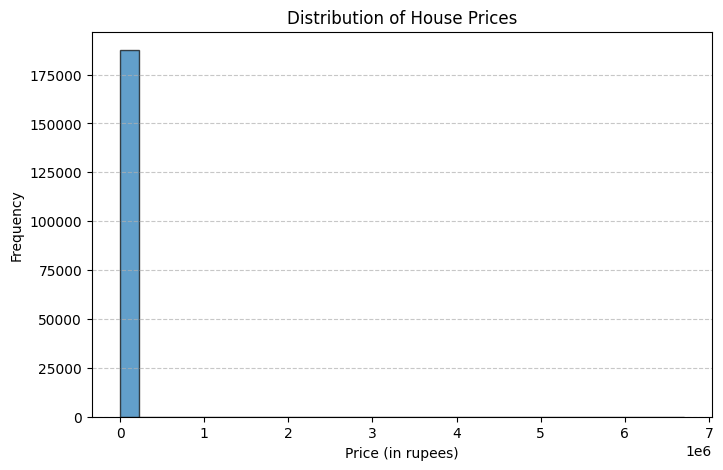

In [14]:


plt.figure(figsize=(8, 5))
plt.hist(df['Price (in rupees)'], bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribution of House Prices")
plt.xlabel("Price (in rupees)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


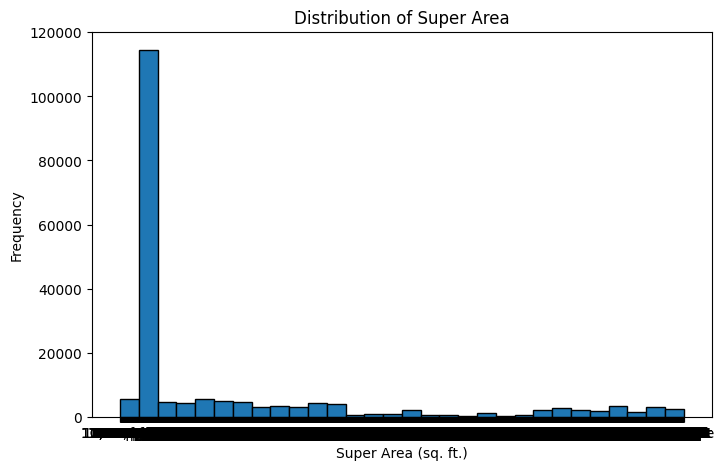

In [15]:
# Sort data by Super Area
sorted_df = df.sort_values(by='Super Area')

# Histogram of Super Area
plt.figure(figsize=(8, 5))
plt.hist(sorted_df['Super Area'], bins=30, edgecolor='black')
plt.title("Distribution of Super Area")
plt.xlabel("Super Area (sq. ft.)")
plt.ylabel("Frequency")
plt.show()




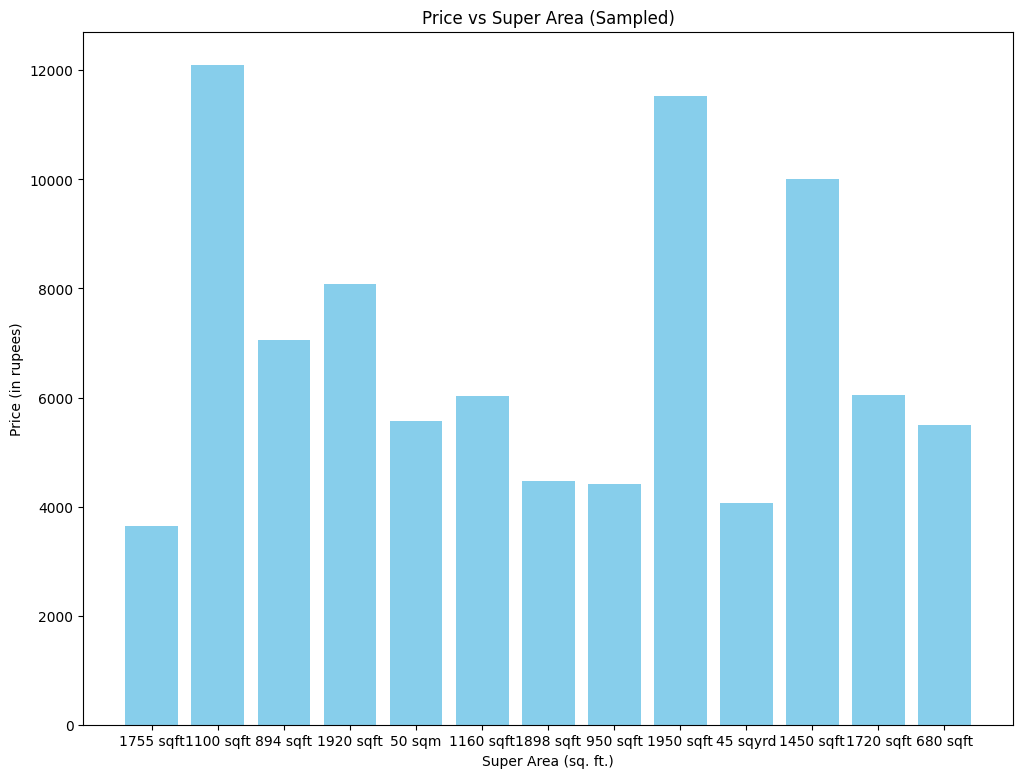

In [16]:
sample_df = sorted_df.sample(30, random_state=1)

plt.figure(figsize=(12, 9))
plt.bar(sample_df['Super Area'], sample_df['Price (in rupees)'], color='skyblue')
plt.title("Price vs Super Area (Sampled)")
plt.xlabel("Super Area (sq. ft.)")
plt.ylabel("Price (in rupees)")
plt.show()


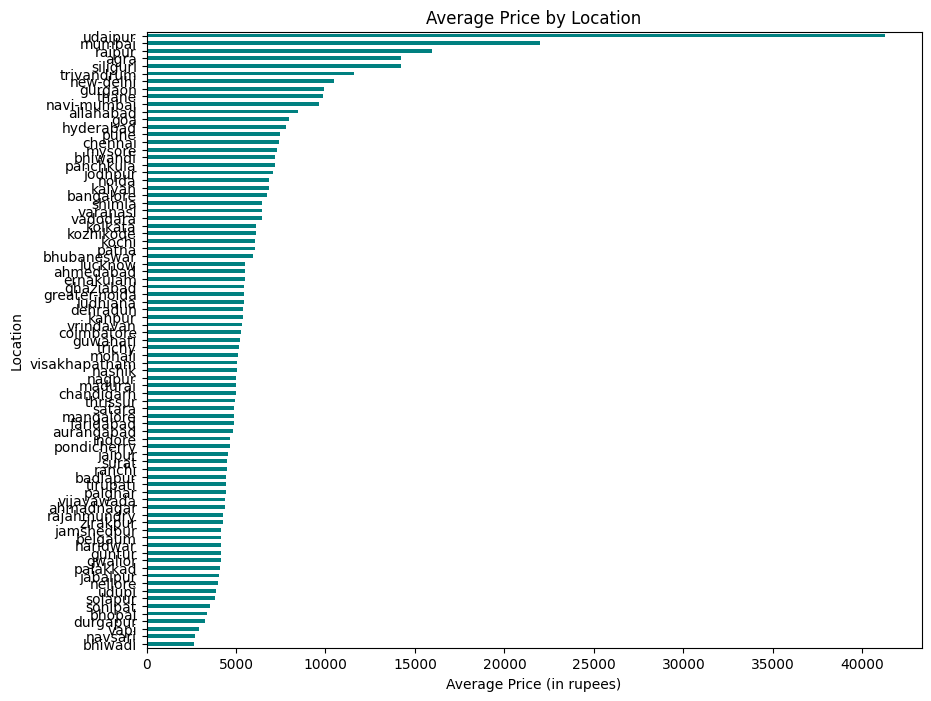

In [17]:
import matplotlib.pyplot as plt

# Group by location and calculate average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
avg_price.plot(kind='barh', color='teal')
plt.title("Average Price by Location")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.show()


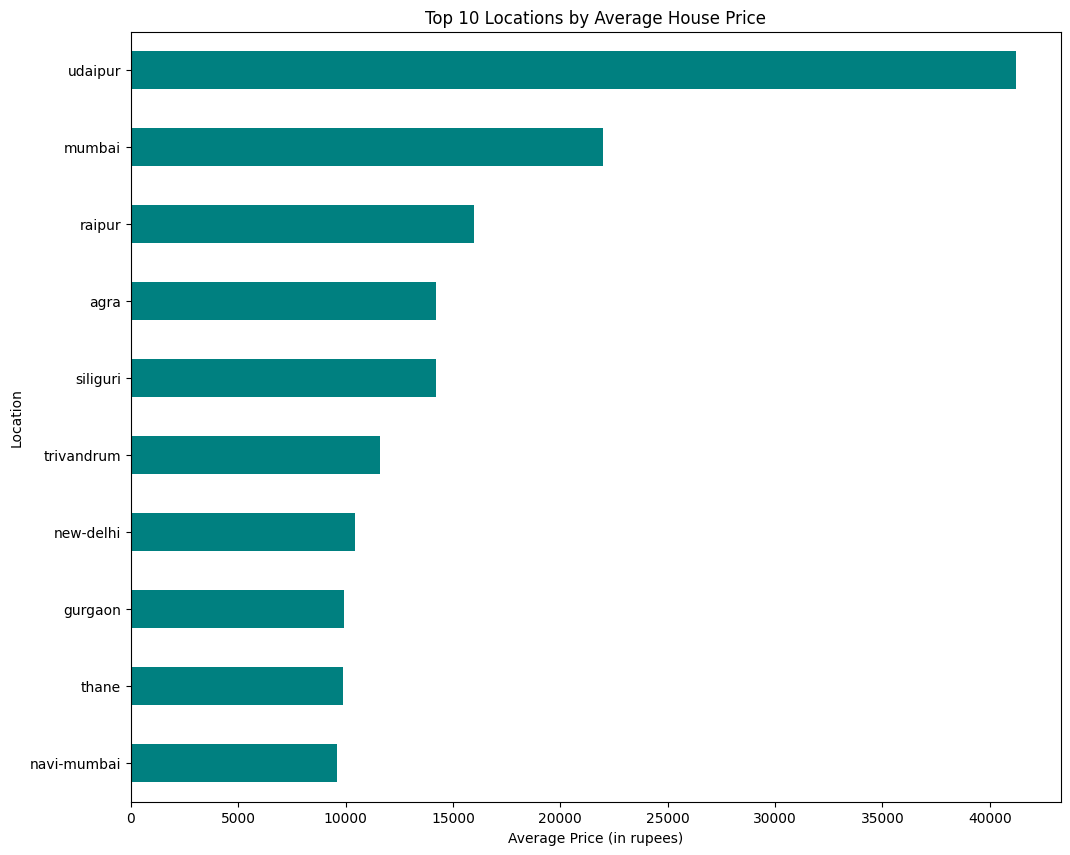

In [18]:
top_locations = avg_price.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 10))
top_locations.plot(kind='barh', color='teal')
plt.title("Top 10 Locations by Average House Price")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.gca().invert_yaxis()  # so the highest appears at the top
plt.show()


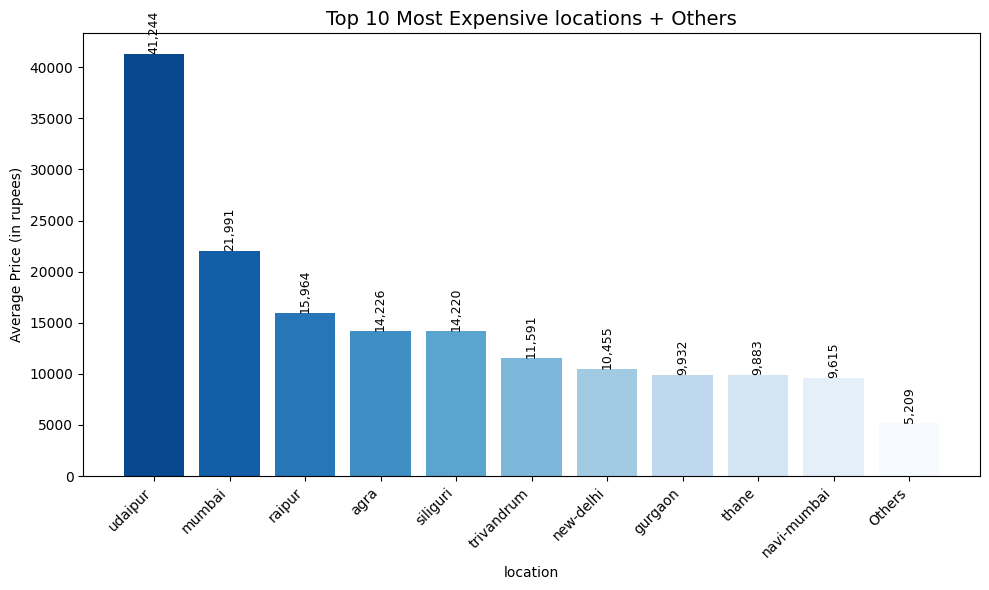

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by location and calculate average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)

# Get top 10 most expensive locations
top_10 = avg_price.head(10)

# Calculate the average price of all other locations
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# Combine top 10 with 'Others' using concat (modern method)
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Sort so that 'Others' stays at the bottom
combined = combined.sort_values(ascending=False)

# Create color gradient (darker blue for higher price)
colors = plt.cm.Blues([i / len(combined) for i in range(len(combined))])[::-1]

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(combined.index, combined.values, color=colors)
plt.title("Top 10 Most Expensive locations + Others", fontsize=14)
plt.xlabel("location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()


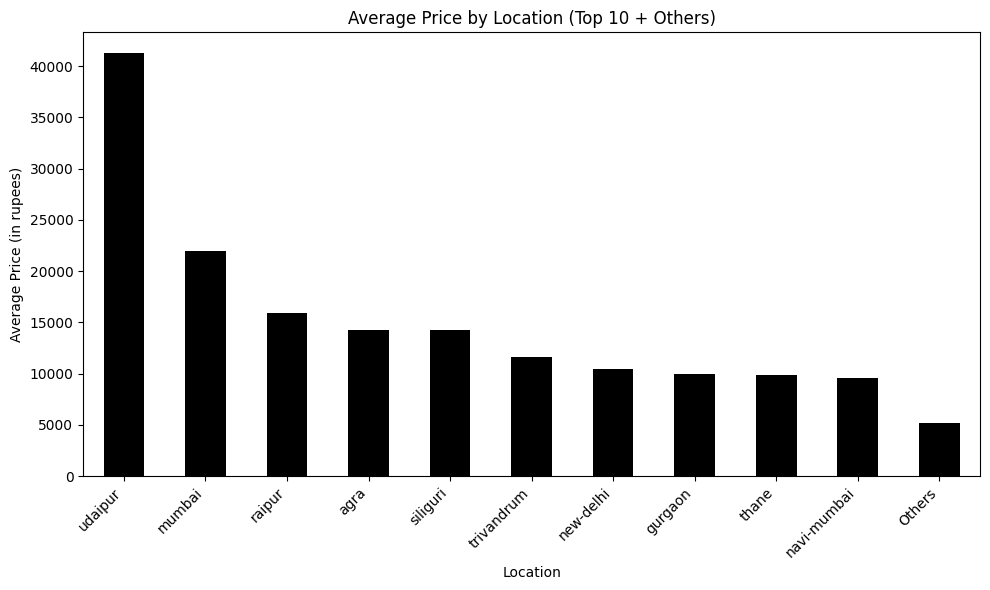

In [20]:
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# Combine top 10 with 'Others' using concat 
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Plot
plt.figure(figsize=(10, 6))
combined.plot(kind='bar', color='Black')
plt.title("Average Price by Location (Top 10 + Others)")
plt.xlabel("Location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


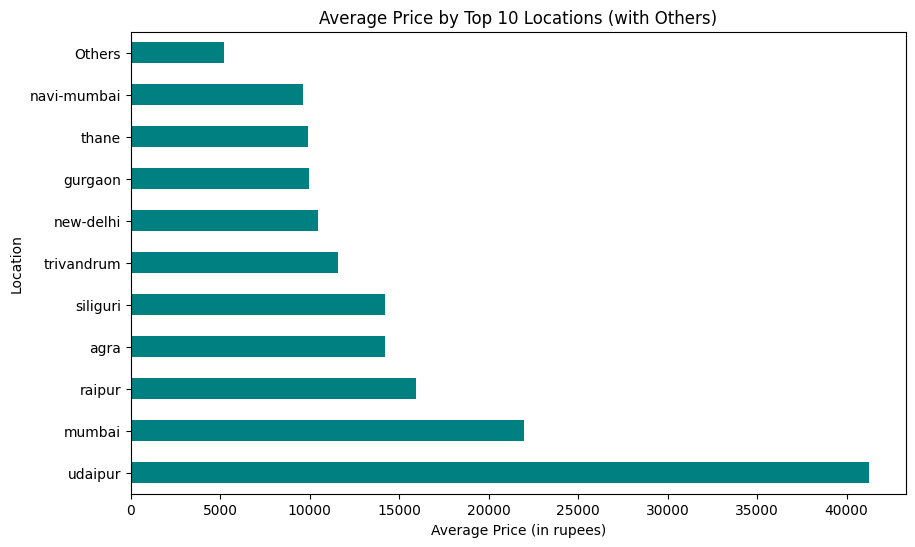

In [21]:
# assume avg_price and top_10 are already defined
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# ✅ replace append() with pd.concat()
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Plot
plt.figure(figsize=(10, 6))
combined.plot(kind='barh', color='teal')
plt.title("Average Price by Top 10 Locations (with Others)")
plt.xlabel("Average Price (in rupees)")
plt.ylabel("Location")
plt.show()

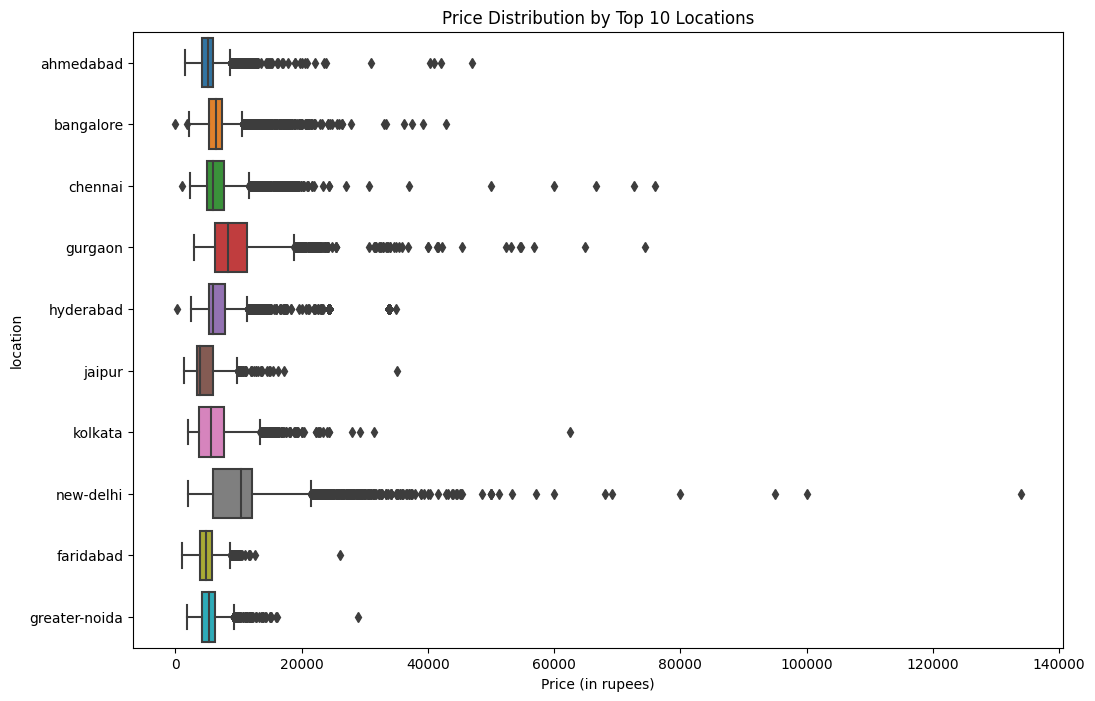

In [22]:


plt.figure(figsize=(12, 8))
top_locs = df['location'].value_counts().head(10).index  # most frequent locations
sns.boxplot(data=df[df['location'].isin(top_locs)], x='Price (in rupees)', y='location')
plt.title("Price Distribution by Top 10 Locations")
plt.show()


/tmp/ipykernel_13/1757579813.py:30: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


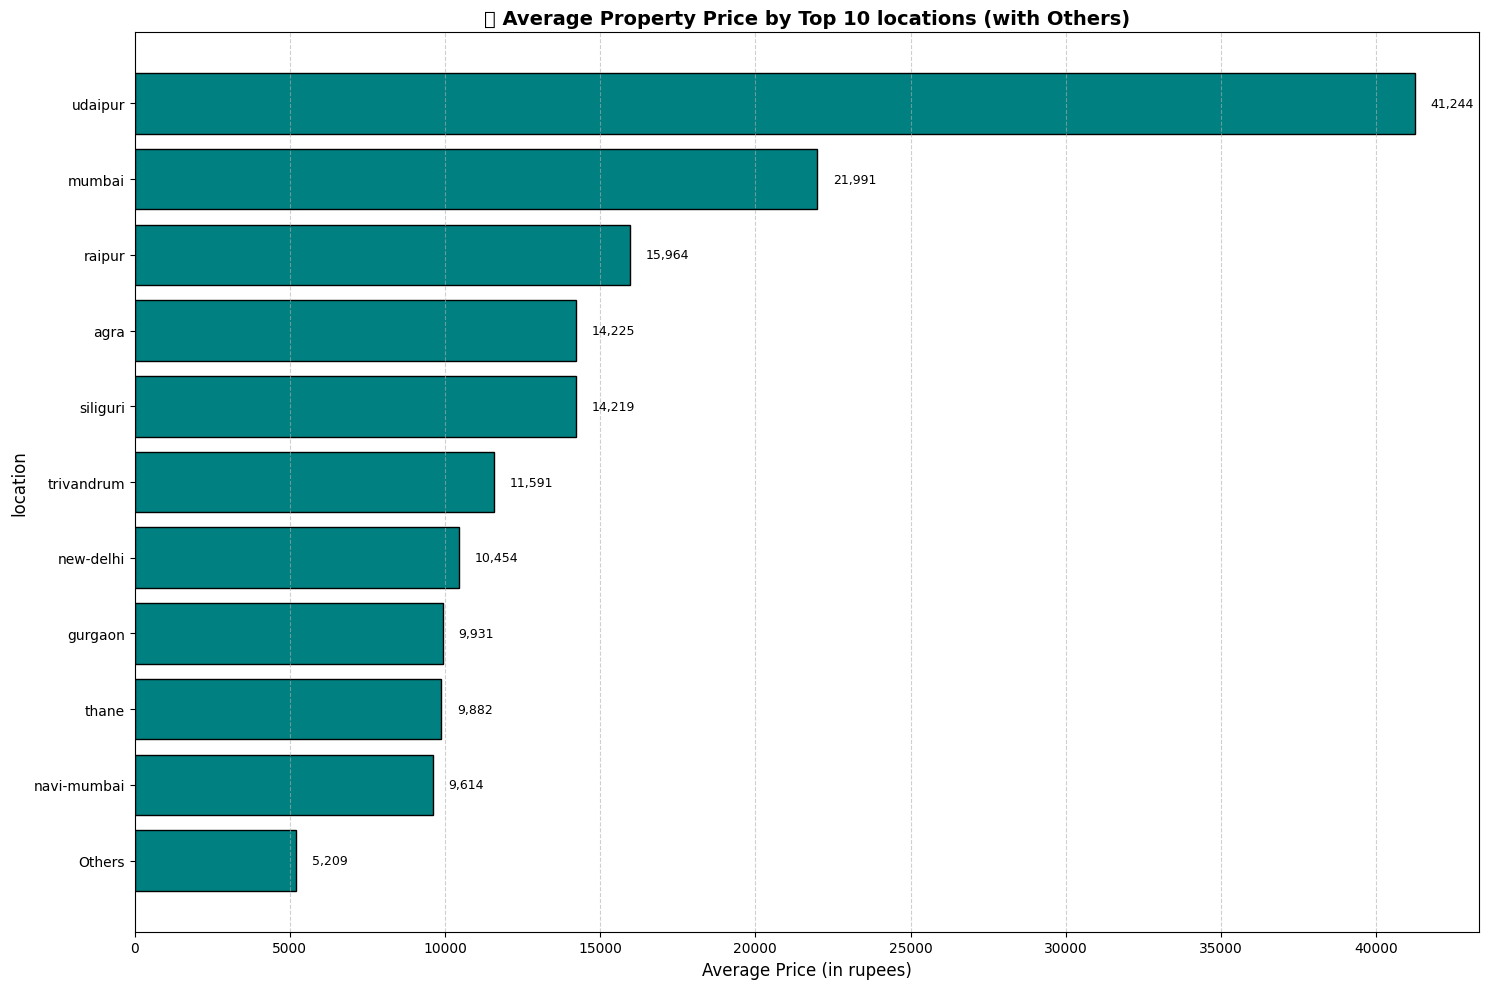

In [23]:
# Calculate average price per location
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)

# Select top 10 and average of the rest
top_10 = avg_price.head(10)
others = avg_price.iloc[10:].mean()

# Combine
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Sort again so 'Others' appears at bottom
combined = combined.sort_values(ascending=True)

# Plot
plt.figure(figsize=(15, 10))
bars = plt.barh(combined.index, combined.values, color='teal', edgecolor='black')

# Add value labels at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width()):,}", va='center', fontsize=9)

# Titles and labels
plt.title("🏙️ Average Property Price by Top 10 locations (with Others)", fontsize=14, weight='bold')
plt.xlabel("Average Price (in rupees)", fontsize=12)
plt.ylabel("location", fontsize=12)

# Clean style
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


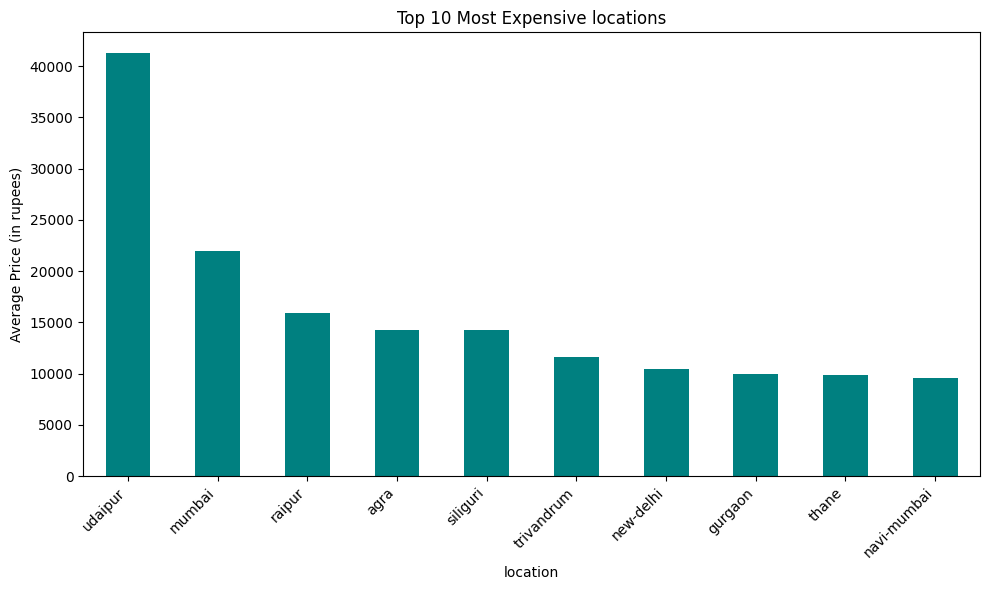

In [24]:
# Group by location and calculate the average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)

# Get the top 10 most expensive locations
top_10 = avg_price.head(10)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
top_10.plot(kind='bar', color='teal')

plt.title('Top 10 Most Expensive locations')
plt.xlabel('location')
plt.ylabel('Average Price (in rupees)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**udaipur is the highest expensive place,as it shows in the chart **


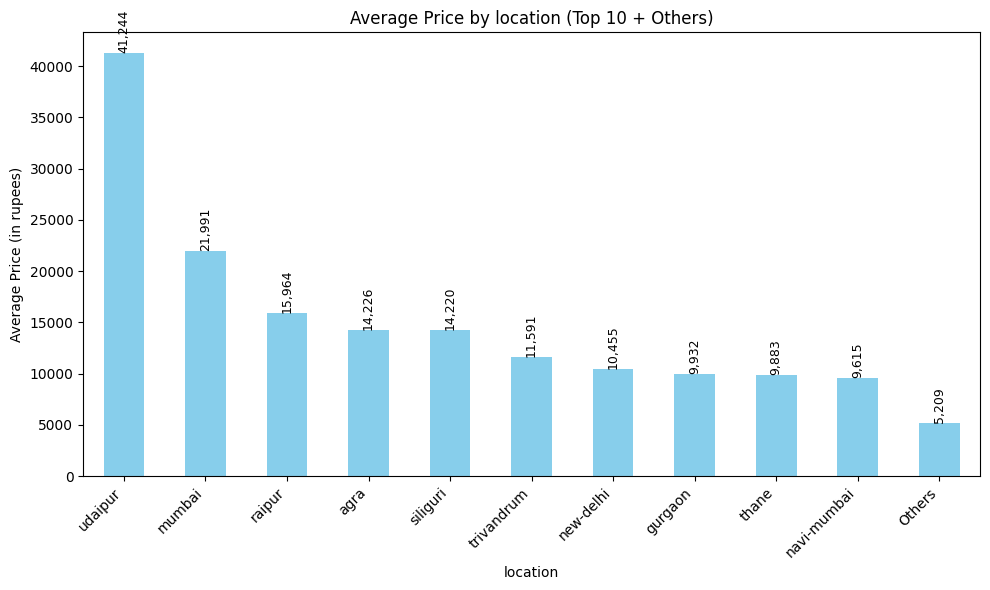

In [25]:
# Group by location and calculate average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False)

# Get top 10 locations
top_10 = avg_price.head(10)

# Calculate average price of all other locations
others = avg_price[~avg_price.index.isin(top_10.index)].mean()

# Combine top 10 with 'Others' using concat
combined = pd.concat([top_10, pd.Series({'Others': others})])

# Sort so that 'Others' stays at the bottom
combined = combined.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = combined.plot(kind='bar', color='skyblue')
plt.title("Average Price by location (Top 10 + Others)")
plt.xlabel("location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Create color gradient (darker for higher price)
colors = plt.cm.Blues([i / len(combined) for i in range(len(combined))])[::-1]
# Add value labels above bars
for i, v in enumerate(combined):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()


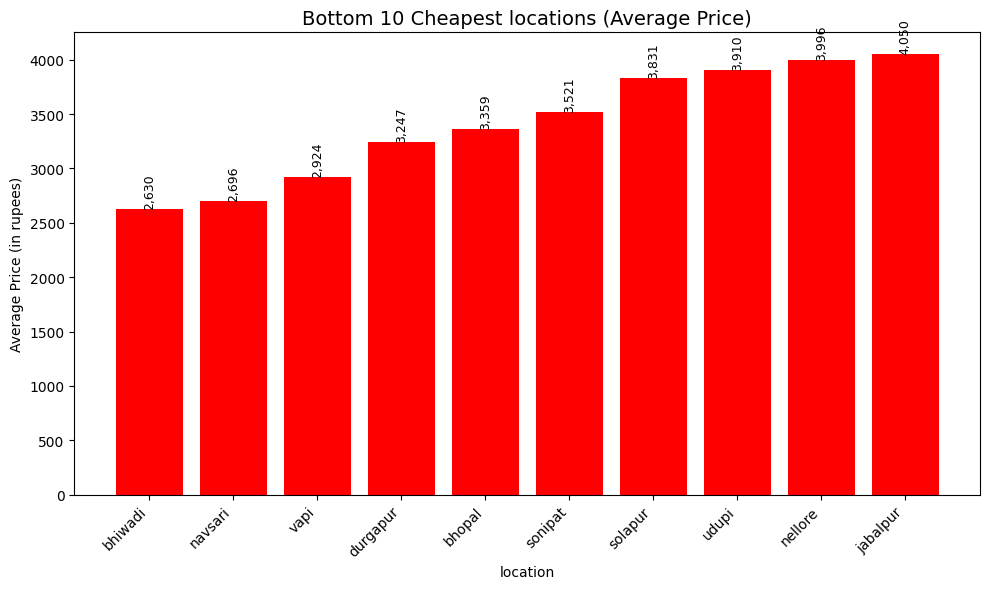

In [26]:
# Group by location and calculate average price
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=True)

# Get bottom 10 (cheapest) locations
bottom_10 = avg_price.head(10)

# Plot vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(bottom_10.index, bottom_10.values, color='red')
plt.title("Bottom 10 Cheapest locations (Average Price)", fontsize=14)
plt.xlabel("location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:,.0f}", 
             ha='center', va='bottom', fontsize=9, rotation=90)

plt.show()


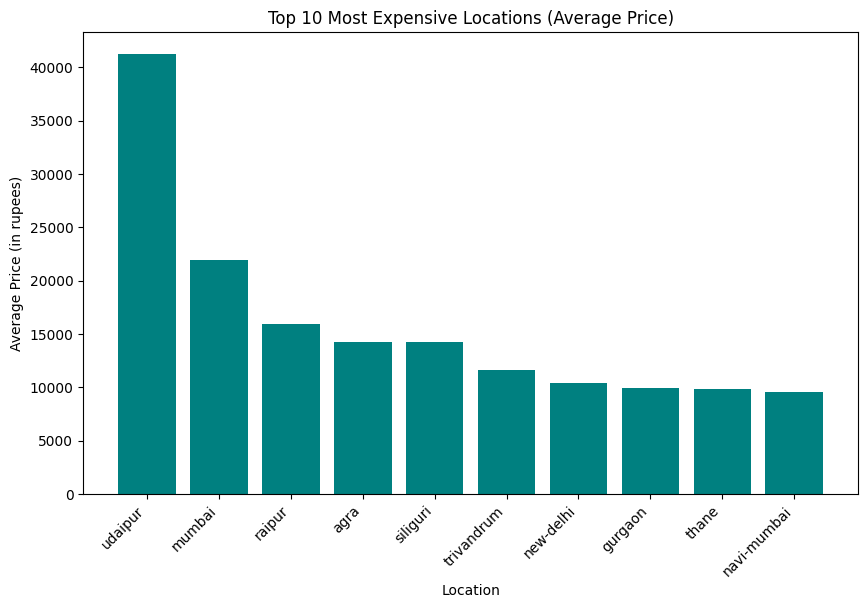

In [27]:
avg_price = df.groupby('location')['Price (in rupees)'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(avg_price.index, avg_price.values, color='teal')
plt.title("Top 10 Most Expensive Locations (Average Price)")
plt.xlabel("Location")
plt.ylabel("Average Price (in rupees)")
plt.xticks(rotation=45, ha='right')
plt.show()
